# Project: Creating Customer Segments

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Reading data

In [34]:
data = pd.read_csv('customers_data.csv')

In [35]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [36]:
data.shape

(440, 8)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Exploration of data

In [38]:
Fmean = np.mean(data['Fresh'])
print('The mean of fresh is :{}'.format(Fmean))

The mean of fresh is :12000.297727272728


In [39]:
Mmean = np.mean(data['Milk'])
print('The mean of milk is :{}'.format(Mmean))

The mean of milk is :5796.265909090909


In [40]:
Gmean = np.mean(data['Grocery'])
print('The mean of Grocery is :{}'.format(Gmean))

The mean of Grocery is :7951.277272727273


In [41]:
Frmean = np.mean(data['Frozen'])
print('The mean of Frozen is :{}'.format(Frmean))

The mean of Frozen is :3071.931818181818


In [42]:
Dpmean = np.mean(data['Detergents_Paper'])
print('The mean of Detergents_Paper is :{}'.format(Dpmean))

The mean of Detergents_Paper is :2881.4931818181817


In [43]:
Dmean = np.mean(data['Delicassen'])
print('The mean of Delicassen  is :{}'.format(Dmean))

The mean of Delicassen  is :1524.8704545454545


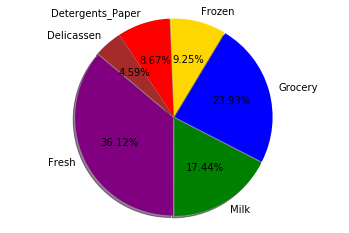

In [44]:
labels = 'Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'
sizes = [Fmean,Mmean,Gmean,Frmean,Dpmean,Dmean]
colors = ['purple', 'green', 'blue', 'gold','red','brown']
explode = (0.01, 0.01, 0.01, 0.01,0.01,0.01)
plt.pie(sizes, labels = labels, colors = colors, explode = explode,
       shadow = True, autopct = '%.2f%%', startangle = 140)
plt.axis('equal')
plt.show()

### Observation                                                                                                                                                                         
According to the mean values and the graph most of the customers buy Fresh,Grocery,Milk

### Selecting Samples

In [45]:
# Select three indices to sample from the dataset
indices = [81,190,338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
samples

Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,219,9540,14403,283,7818,156
1,1,3,16936,6250,1981,7332,118,64
2,1,2,3,333,7021,15601,15,550


## Feature Relevance
To know is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products. We can determine this by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [46]:
new_data = data.drop('Grocery', axis=1)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, data.Grocery, test_size=0.25, random_state=42)


In [48]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print("Prediction score is: {}".format(score))

Prediction score is: 0.6078054123709274


#### Observation
As we obtained high score, it as indicator of a very good fit. So this feature is easy to predict considering the rest of spendign habits and, therefore, not very necessary for identifying customers' spending habits.

## Visualizing Feature Distributions

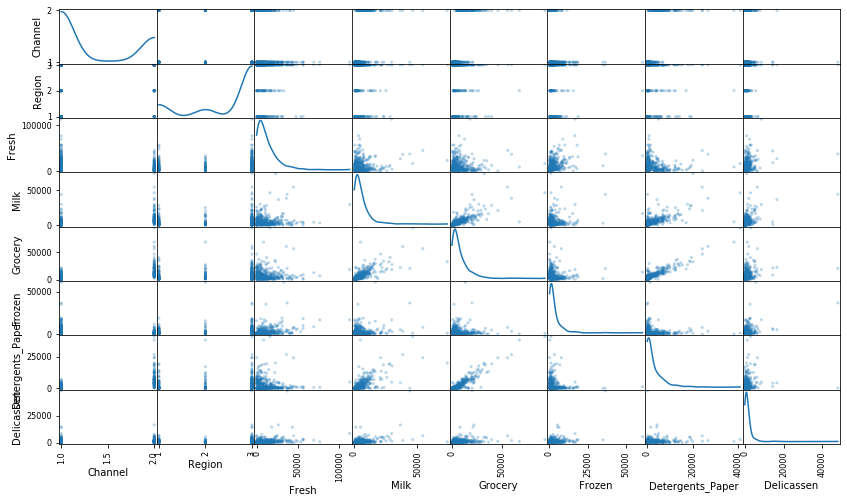

In [50]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Generate a heatmap for collinearity

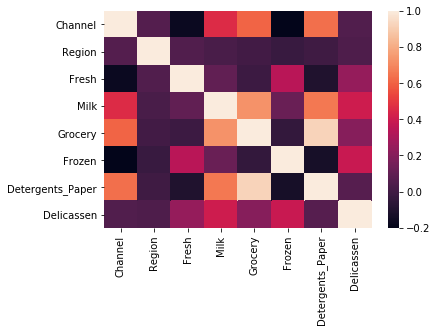

In [51]:
sns.heatmap(data.corr())

#### Observation
From the scatter plots and the heatmap of correlation, we can see that there is a strong correlation between the ‘Grocery’ and ‘Detergent_paper’ features.                                                                                                     
This correlation confirms that the ‘Grocery’ feature can be accurately predicted with the ‘Detergent_paper’ feature and therefore is not an absolutely necessary feature in the dataset.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from our analysis are significant and meaningful.

### Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by  applying the natural logarithm., which calculates the best power transformation of the data that reduces skewness.

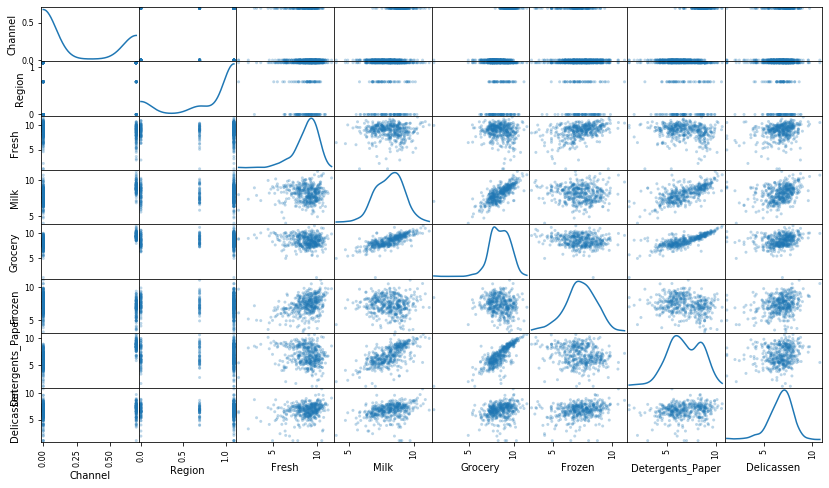

In [52]:
# Scale the data using the natural logarithm 
log_data = np.log(data)  
# Scale the sample data using the natural logarithm 
log_samples = np.log(samples)  
# Produce a scatter matrix for each pair of newly-transformed features 
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature appear much more normal. For any pairs of features we have identified earlier as being correlated, we observe here that correlation is still present

In [53]:
log_samples

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.693147,1.098612,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
1,0.000000,1.098612,9.737197,8.740337,7.591357,8.900004,4.770685,4.158883
2,0.000000,0.693147,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


### Outlier Detection
Outliers should be removed because algorithims like K-Means is heavily influenced by the presence of outliers as they increase significantly the loss function that the algorithm tries to minimize. This loss function is the squared sum of the distances of each datapoint to the centroid, so, if the outlier is far enough, the centroid will be incorrectly situated

In [54]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate 25th percentile of the data for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate 75th percentile of the data for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'Channel':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Region':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
196,0.000000,0.0,10.329539,8.883086,8.496378,9.836867,6.637258,7.964156
197,0.693147,0.0,7.794411,8.867427,9.248695,7.027315,8.369621,7.291656
198,0.000000,0.0,9.366147,7.675082,8.828201,8.168203,6.383507,6.546785
199,0.000000,0.0,9.176784,7.731931,7.655391,6.253829,5.996452,5.849325
200,0.693147,0.0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
...,...,...,...,...,...,...,...,...
268,0.693147,0.0,9.384966,8.993800,9.895808,6.974479,8.759982,6.548219
269,0.000000,0.0,9.630234,5.552960,7.037028,7.830426,5.808142,5.318120
270,0.000000,0.0,8.459564,6.939254,6.882437,8.612503,5.283204,4.025352
271,0.000000,0.0,7.641564,8.518592,7.354362,7.021084,4.990433,7.346010


Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,0.693147,1.098612,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,0.000000,1.098612,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,0.693147,1.098612,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,0.693147,1.098612,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,0.693147,1.098612,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,0.693147,0.000000,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,0.693147,0.693147,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,0.693147,1.098612,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,0.000000,1.098612,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,0.000000,1.098612,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,0.693147,1.098612,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,0.693147,1.098612,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,0.693147,1.098612,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,0.693147,1.098612,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,0.693147,0.000000,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,0.000000,0.693147,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,0.000000,1.098612,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,0.000000,1.098612,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,0.000000,1.098612,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,0.0,1.098612,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,0.693147,1.098612,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,0.000000,1.098612,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,0.000000,1.098612,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,0.000000,1.098612,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,0.000000,1.098612,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,0.000000,1.098612,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,0.000000,0.000000,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [55]:
outliers[2:]

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [56]:
# Detecting outliers that appear in more than one product
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
dupes

[65, 66, 75, 128, 154, 203, 218, 233, 264]

In [57]:
# Removing outliers

good_data = log_data.drop(dupes, axis=0).reset_index(drop=True)

### Feature Transformation
Using principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [58]:
#Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1])
pca = pca.fit(good_data)
pca_samples = pca.transform(log_samples)

In [59]:
def pca_results(good_data, pca):
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)


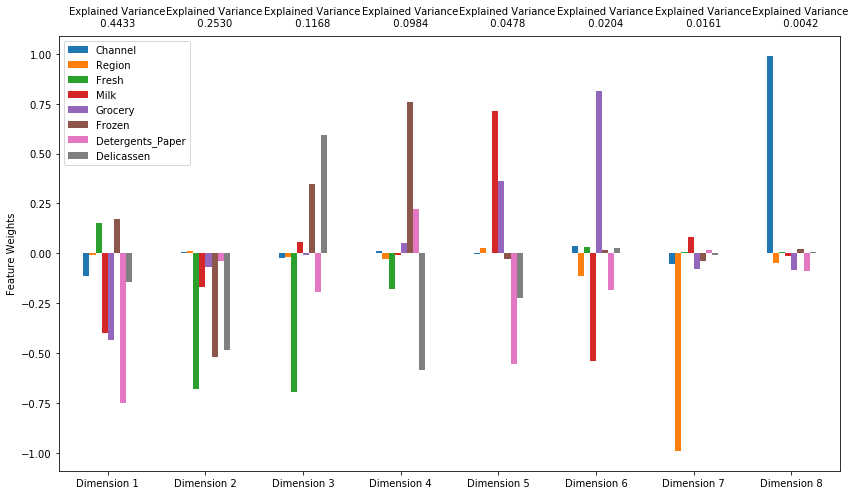

In [60]:
# Generate PCA results plot
pca_results = pca_results(good_data, pca)

### Observation
The variance explained by the first two Principal Components is the 70.68% of the total.                                       
The variance explained by the first three Principal Components is the 93.11% of the total.
  #### Dimensions
- Dimension 1: This dimension represents well, in terms of negative variance, the following features: Detergent_Paper, Milk and   groceries. Mostly utilities for everyday consuming.                                                                           
- Dimension 2: This dimension represents well, in terms of negative variance, the following features: Fresh, Frozen and          - Delicatessen. Mostly food consuming.                                                                                         
- Dimension 3: This dimension represents well, in terms of positive variance, the Delicatessen features, and in terms of           negative variance de Fresh feature. Food to be consumed on the day.                                                           
- Dimension 4: This dimension represents well, in terms of positive variance, the Frozen feature, and in terms of negative         variance, the Delicatessen Feature. Food that can be storaged.

In [61]:
# Display sample log-data after having a PCA transformation applied
pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8
0,-3.1576,3.6752,0.3982,0.8201,0.3592,-0.2300,-0.1530,0.0767
1,2.4446,-0.1849,-1.1934,2.0014,1.7837,-0.7080,-0.1629,0.0344
2,3.1435,4.7326,6.5780,2.5109,0.7683,2.1332,-0.2203,0.1289


### Dimensionality Reduction

In [62]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [63]:
# Display sample log-data after applying PCA transformation in two dimensions
pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])

,Dimension 1,Dimension 2
0,-3.1576,3.6752
1,2.4446,-0.1849
2,3.1435,4.7326


### Visualizing 

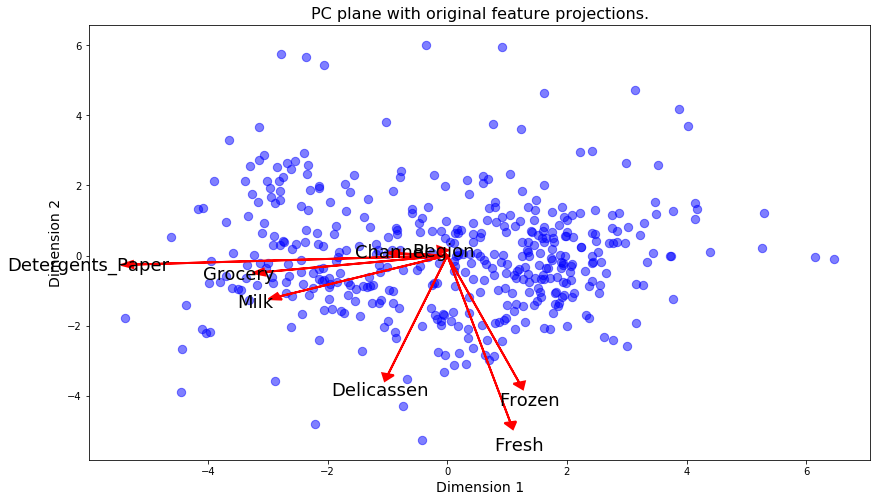

In [64]:
fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
for i, v in enumerate(feature_vectors):
    ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
    ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)
ax.set_title("PC plane with original feature projections.", fontsize=16);

# Clustering

### K-Means vs GMM
The main advantages of using K-Means as a cluster algorithm are:
- It is easy to implement.
- With large number of variables, if (K is small), it may be computationally faster than hierarchichal clustering.
- Consistent and scale-invariant.
- It is guaranteed to converge.

The main advantages of using Gaussian Mixture Models as a cluster algorithm are:
- It is much more flexible in terms of cluster covariance. Which means that each cluster can have unconstrained covariance structure. In other words, whereas K-means assumes that every cluster have spherical estructure, GMM allows eliptical.
- Points can belong to different clusters, with different level of memebership. This level of membership is the probability of each point to belong to each cluster.

Chosen algorithm:                                                                                                               
The chosen algorithm is Gaussian Mixture Model. Because data is not splitted in clear and different clusters, so we do not know how many clusters there are.

In [65]:
# Import the necessary libraries
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}
for i in range(2,7):
    
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(random_state=42, n_components=i)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_
    print('Cluster Center: ' + str(centers))

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    print('Sample predictions: ' + str(sample_preds))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
    
print('Scores: ' + str(scores))

Number of clusters: 2
Cluster Center: [[-2.21772892  0.33698221]
 [ 1.28735562 -0.1956127 ]]
Sample predictions: [0 1 1]
Silhouette score is: 0.4305238662205696 

Number of clusters: 3
Cluster Center: [[-1.41796522 -0.58283971]
 [-2.68949387  0.97160537]
 [ 1.40259508 -0.04483483]]
Sample predictions: [1 2 2]
Silhouette score is: 0.3219442880820628 

Number of clusters: 4
Cluster Center: [[-0.95796051 -0.77131536]
 [ 0.61887686  0.41862245]
 [ 1.57604034 -0.13170651]
 [-2.84218884  0.70113608]]
Sample predictions: [3 2 1]
Silhouette score is: 0.3123546367484509 

Number of clusters: 5
Cluster Center: [[ 1.25685057 -1.10811757]
 [ 0.36240639  0.44569262]
 [ 1.53808674 -0.10696886]
 [-1.73977515 -0.34691877]
 [-2.9563724   1.36147916]]
Sample predictions: [4 2 1]
Silhouette score is: 0.24319858578970682 

Number of clusters: 6
Cluster Center: [[ 0.16925343 -1.97831971]
 [ 0.19740778  0.47224213]
 [ 1.79018116 -0.31512641]
 [-2.11974659 -0.58612441]
 [-2.79133515  1.73494244]
 [ 2.5928809

In [66]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(random_state=42, n_components=2)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_
print('Cluster Center: ' + str(centers))

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
print('Sample predictions: ' + str(sample_preds))

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
scores[i] = score
print('Silhouette score is: ' + str(score), '\n')

Cluster Center: [[-2.21772892  0.33698221]
 [ 1.28735562 -0.1956127 ]]
Sample predictions: [0 1 1]
Silhouette score is: 0.4305238662205696 



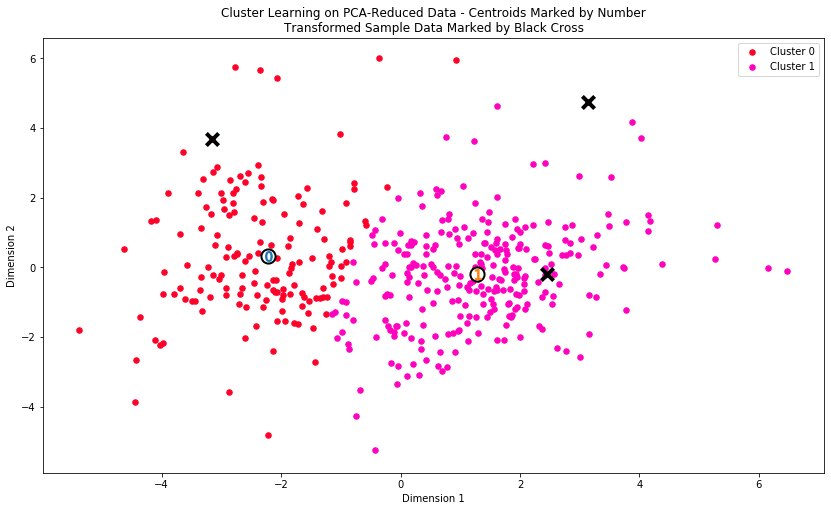

In [75]:
predictions = pd.DataFrame(preds, columns = ['Cluster'])
plot_data = pd.concat([predictions, reduced_data], axis = 1)

# Generate the cluster plot
fig, ax = plt.subplots(figsize = (14,8))

# Color map
cmap = cm.get_cmap('gist_rainbow')

# Color the points based on assigned cluster
for i, cluster in plot_data.groupby('Cluster'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

# Plot centers with indicators
for i, c in enumerate(centers):
    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
               alpha = 1, linewidth = 2, marker = 'o', s=200);
    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

# Plot transformed sample points 
ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
           s = 150, linewidth = 4, color = 'black', marker = 'x');

# Set plot title
ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");



## Data Recovery

In [76]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,2.0,2.0,3757.0,7779.0,12126.0,881.0,4650.0,952.0
Segment 1,1.0,2.0,9148.0,2088.0,2720.0,2119.0,342.0,751.0


Segment 0 may represent a a fresh food market as every feature except Frozen and Fresh are below the median.
Segment 1 may represent a supermarket as every feature except fresh and frozen are above the median.

In [77]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


#### Observation
- Sample point 0 :Supermarket and the original guess was a retailer. This difference may be explained because of the size of the cluster (which is pretty big)
- Sample point 1 : Supermarket and the originak guess was the same.
- Sample point 2 : Fresh food market and the original guess was a restaurant which is reasonable considering the amount of the spending of the features.

## Visualizing Underlying Distributions

In [87]:
def channel_results(reduced_data, outliers, pca_samples):


    # Check that the dataset is loadable
    try:
        full_data = pd.read_csv("customers_data.csv")
    except:
        print("Dataset could not be loaded. Is the file missing?")       
        return False

    # Create the Channel DataFrame
    channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
    channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
    labeled = pd.concat([reduced_data, channel], axis = 1)
    
    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned Channel
    labels = ['Hotel/Restaurant/Cafe', 'Retailer']
    grouped = labeled.groupby('Channel')
    for i, channel in grouped:   
        channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
    
# Plot transformed sample points   
    for i, sample in enumerate(pca_samples):
        ax.scatter(x = sample[0], y = sample[1], \
               s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
        ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

# Set plot title
    ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

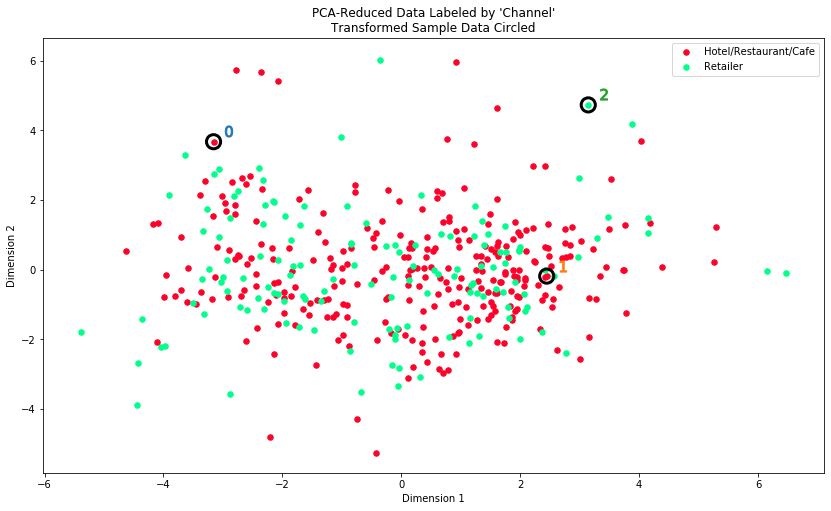

In [88]:
channel_results(reduced_data, preds, pca_samples)

### Observation
We can observe that the cluster algorithm does a pretty good job of clustering the data to the underlying distribution as the cluster 0 can be associated perfectly with a retailer and the cluster 1 to the Ho/Re/Ca.

# Conclusion
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a customer segment it best identifies with (depending on the clustering algorithm applied), we can consider 'customer segment' as an engineered feature for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a customer segment to determine the most appropriate delivery service.